In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
nyc_df= pd.read_csv(r"C:\Users\DELL XPS\Desktop\skillenable\ML\nyc_taxi.csv")

In [4]:
nyc_df.shape

(1458644, 11)

In [5]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_26780\2691908906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(nyc_df['trip_duration'])).set(title='Distribution Plot with Log')


[Text(0.5, 1.0, 'Distribution Plot with Log')]

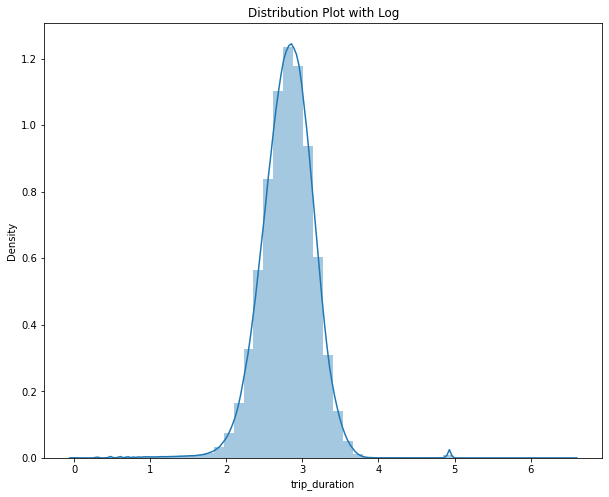

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(nyc_df['trip_duration'])).set(title='Distribution Plot with Log')

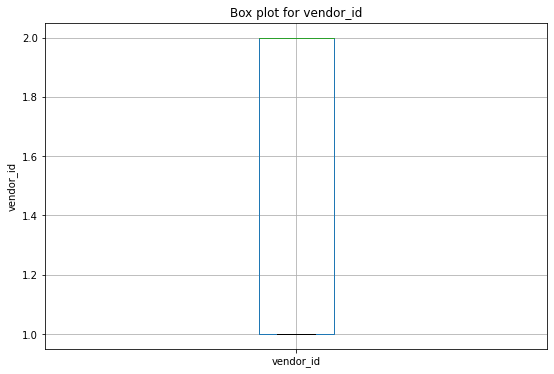

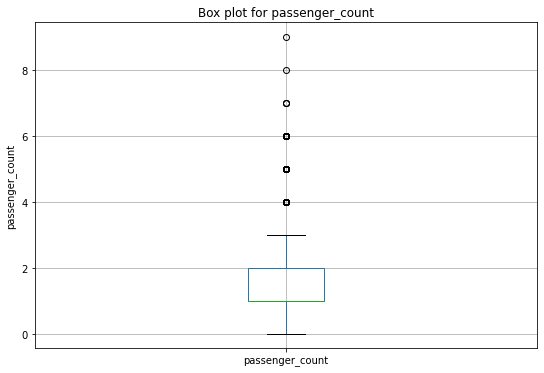

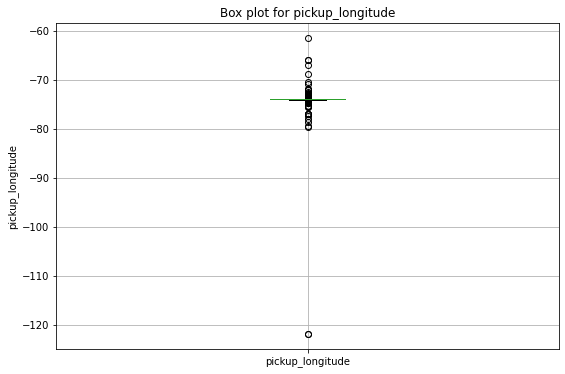

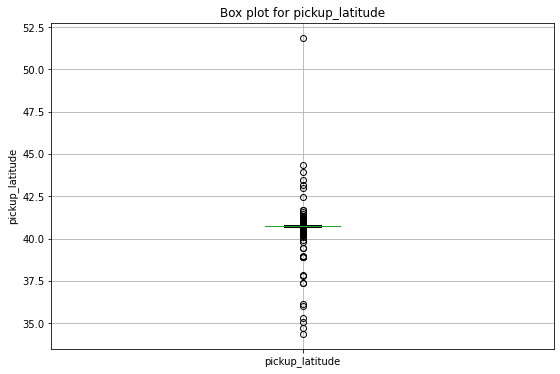

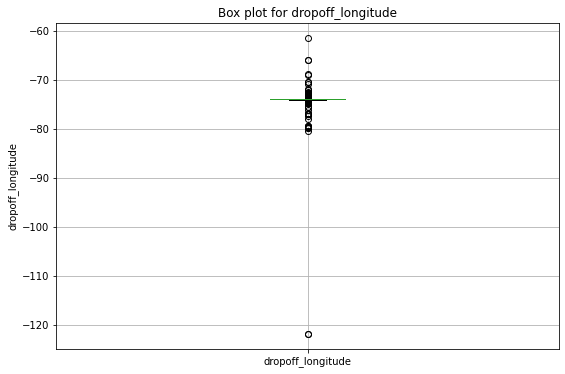

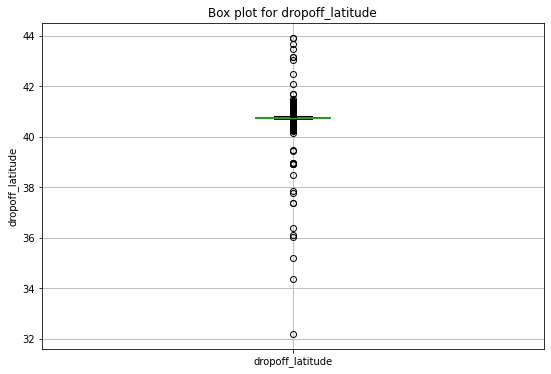

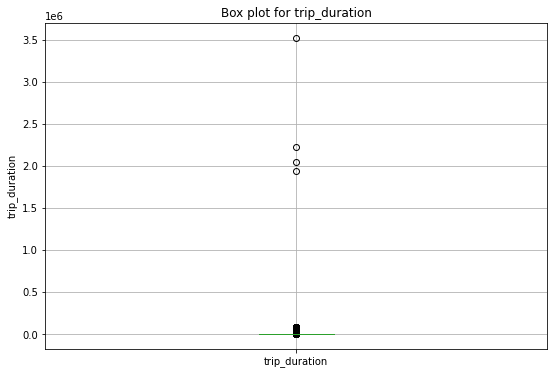

In [14]:
for col in nyc_df.describe().columns:
    figr = plt.figure(figsize=(9, 6))
    #print(col)
    ax = figr.gca()
    nyc_df.boxplot(column = col, ax = ax)
    ax.set_ylabel(col)
    plt.title(f"Box plot for {col}")
    plt.show()


In [15]:
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


Text(0.5, 1.0, 'Number of dropoffs done on each day of the week')

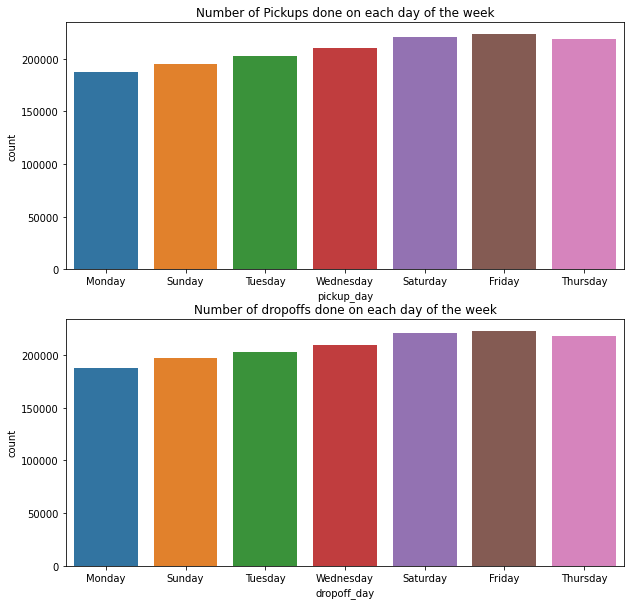

In [17]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=nyc_df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder=LabelEncoder()

In [20]:
nyc_df['store_and_fwd_flag']=encoder.fit_transform(nyc_df['store_and_fwd_flag'])
nyc_df['pickup_day']=encoder.fit_transform(nyc_df['pickup_day'])
nyc_df['dropoff_day']=encoder.fit_transform(nyc_df['dropoff_day'])

In [31]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int32         
 10  trip_duration       1458644 non-null  int64         
 11  pickup_day          1458644 non-null  int32         
 12  dropoff_day         1458644 non-null  int32         
 13  distance    

In [29]:
correlation_matrix= nyc_df.corr()

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_26780\2981925323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= nyc_df.corr()


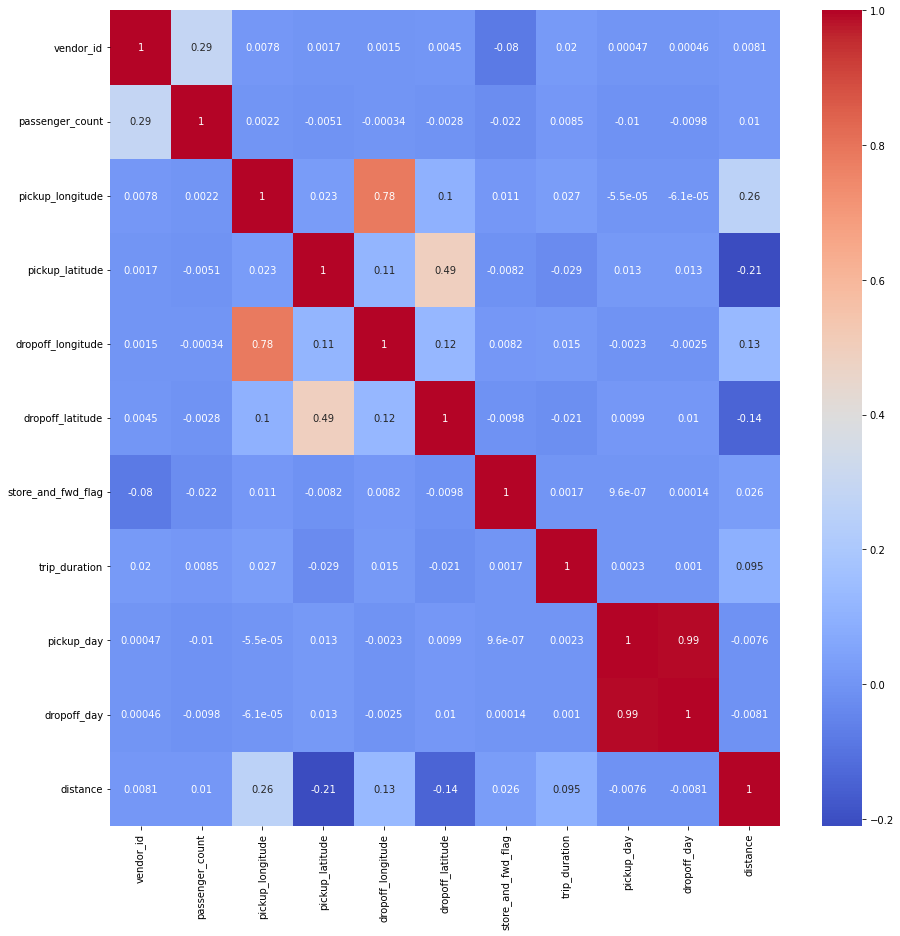

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [25]:
!pip install haversine

  Obtaining dependency information for haversine from https://files.pythonhosted.org/packages/5b/f1/b7274966f0b5b665d9114e86d09c6bc87d241781d63d8817323dcfa940c6/haversine-2.8.1-py2.py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from haversine import haversine
def calc_dist(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)


In [28]:
nyc_df["distance"] = nyc_df.apply(lambda x: calc_dist(x),axis=1)

In [32]:
x=nyc_df.drop(['id','pickup_datetime','dropoff_datetime'],axis=1)

In [33]:
y=nyc_df['trip_duration']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [35]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1166915, 11) (1166915,)
(291729, 11) (291729,)


In [36]:
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
lr=LinearRegression()

In [37]:
dtr.fit(x_train,y_train)
y_pred_dtr=dtr.predict(x_test)
dtr.score(x_test,y_test)

0.9999830801031871

In [43]:
from matplotlib import legend
def EvaluationMetrics(yt,yp):
    MSE=mean_squared_error(yt,yp)
    RMSE=(np.sqrt(MSE))
    R2=r2_score(yt,yp)
    print("MSE: ", MSE, "RMSE: ", RMSE, "R2 Score: ", R2)
    plt.figure(figsize=(18,6))
    plt.plot((np.array(yp)[:100]))
    plt.figure(figsize=(18,6))
    plt.plot((np.array(yt)[:100]))


MSE:  160.4862115182241 RMSE:  12.66831525966354 R2 Score:  0.9999830801031871


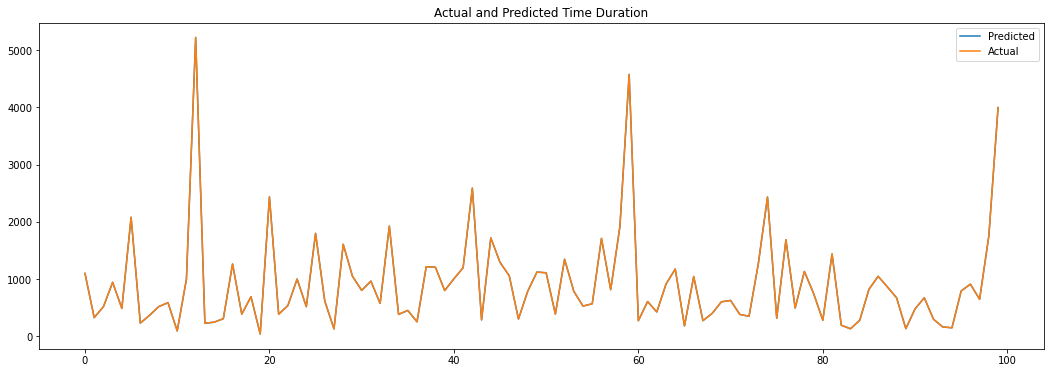

In [44]:
EvaluationMetrics(y_test,y_pred_dtr)

In [45]:
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
lr.score(x_test,y_test)

1.0

In [ ]:
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
rfr.score(x_test,y_test)